In [1]:
# Importing libraries 
import os
import json
import datetime
import numpy as np
import pandas as pd
import skimage.draw
import cv2
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Import Mask RCNN
from mrcnn.visualize import display_instances
from mrcnn import model as modellib, utils
from mrcnn.config import Config
import mrcnn.mrcnnCustom as mrcnnCustom
import mrcnn.updatedUtils as updatedUtils

Using TensorFlow backend.


In [8]:
# Loading the dataset 
PATHS = {
    "root_dir": "",
    "checkpoint_path": "model/logs", 
    "trained_weights": "model/logs/petrol station20240929T0917/mask_rcnn_petrol station_0080.h5"
}

# Defining object name 
objectList = ["petrol station"]

In [9]:
class PredictionConfig(Config):
    NAME = "petrol station"
    
    # Max images per GPU in the testing phase is 1
    IMAGES_PER_GPU = 1

    # Background + object of interest
    NUM_CLASSES = 1 + 1     
    
    DETECTION_MIN_CONFIDENCE = 0.9

config = PredictionConfig()

In [10]:
model_eval = modellib.MaskRCNN(mode = "inference", model_dir=PATHS["checkpoint_path"], config=config)
model_eval.load_weights(PATHS["trained_weights"], by_name=True)

In [11]:
# Evaluating the folder
imageSubFolder = "train"
mrcnnCustom.modelEvaluate(config, model_eval, PATHS["root_dir"], imageSubFolder, objectList)

print()

imageSubFolder = "val"
mrcnnCustom.modelEvaluate(config, model_eval, PATHS["root_dir"], imageSubFolder, objectList)

Training Set
Mean Average Precision for the whole set of images =  0.794
F1 Score for the whole set of images =  0.556

Validation Set
Mean Average Precision for the whole set of images =  0.742
F1 Score for the whole set of images =  0.519


PREDICTIONS : 

Images: 7
Classes: ['BG', 'petrol station']

1 ) 64.PNG

4  out of  4  objects detected  



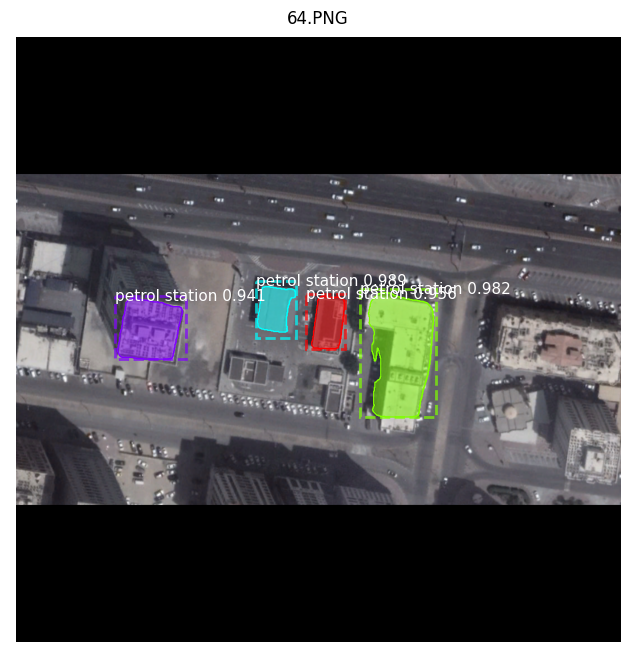


Average Precision :  0.75
Precison :  0.792
Recall :  0.542
F1 Score :  0.643

2 ) 76.PNG

1  out of  1  objects detected  



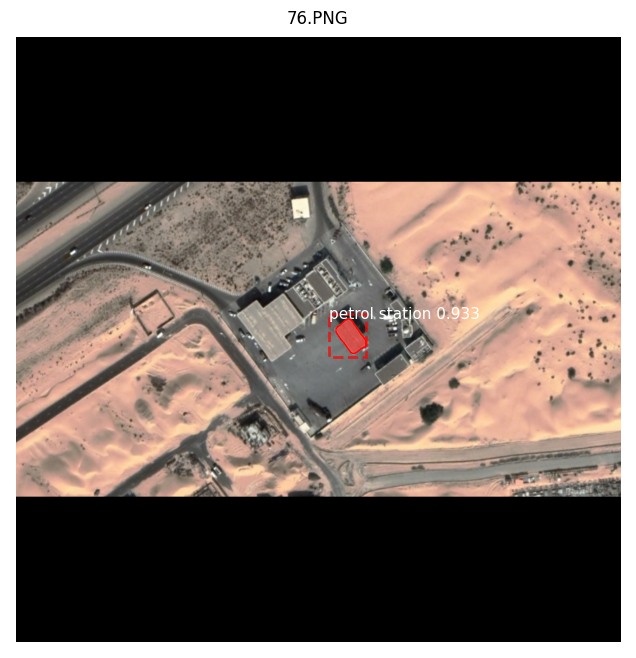


Average Precision :  0.0
Precison :  0.0
Recall :  0.333
F1 Score :  0.0

3 ) 91.PNG

1  out of  2  objects detected  



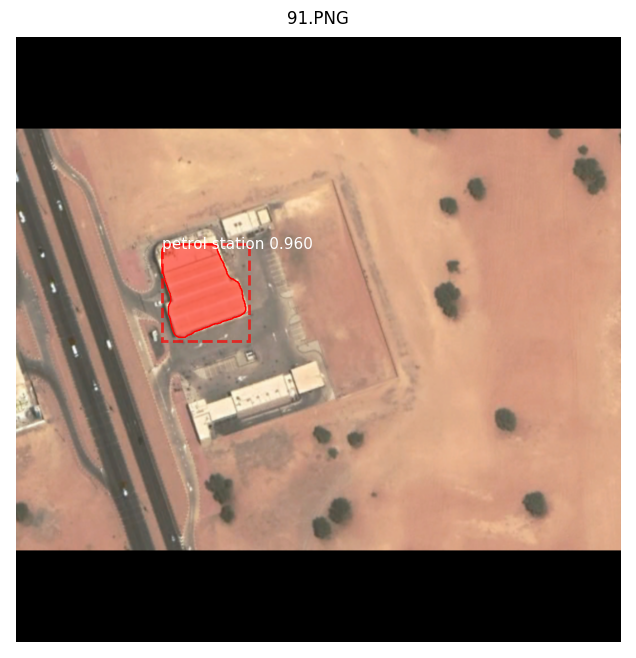


Average Precision :  0.5
Precison :  0.667
Recall :  0.5
F1 Score :  0.571

4 ) 185.PNG

3  out of  1  objects detected  



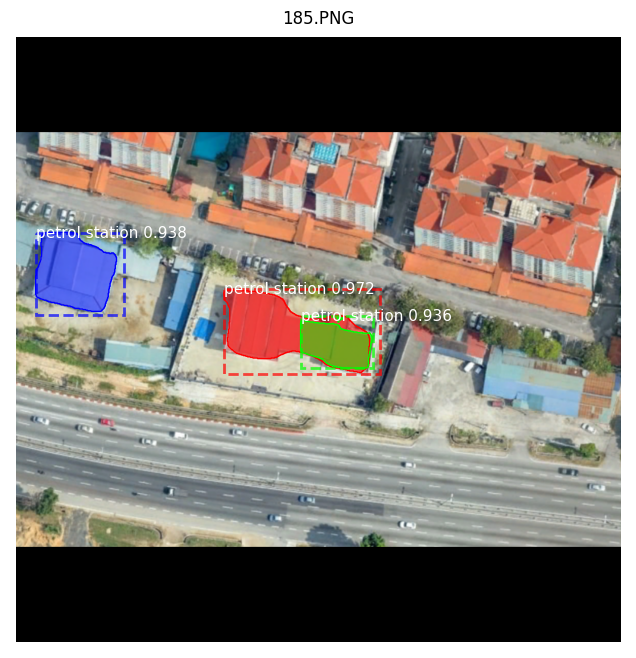


Average Precision :  1.0
Precison :  0.567
Recall :  0.8
F1 Score :  0.663

5 ) 299.PNG

1  out of  1  objects detected  



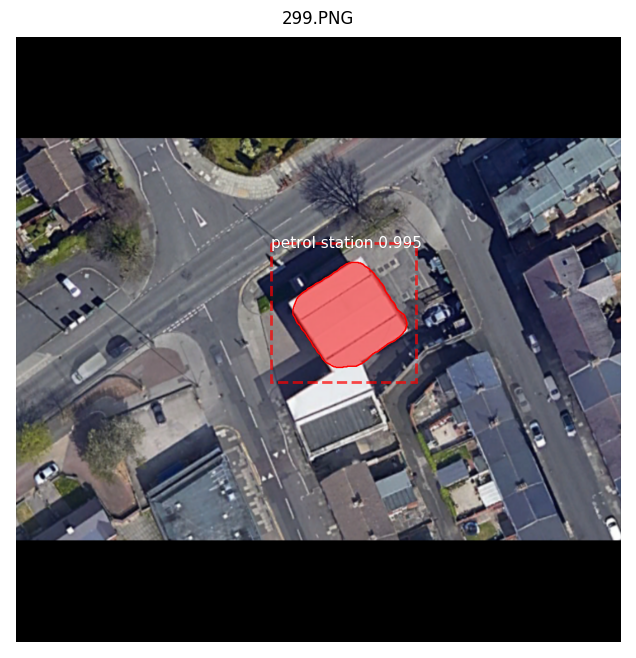


Average Precision :  1.0
Precison :  0.667
Recall :  0.667
F1 Score :  0.667

6 ) 312.PNG

1  out of  1  objects detected  



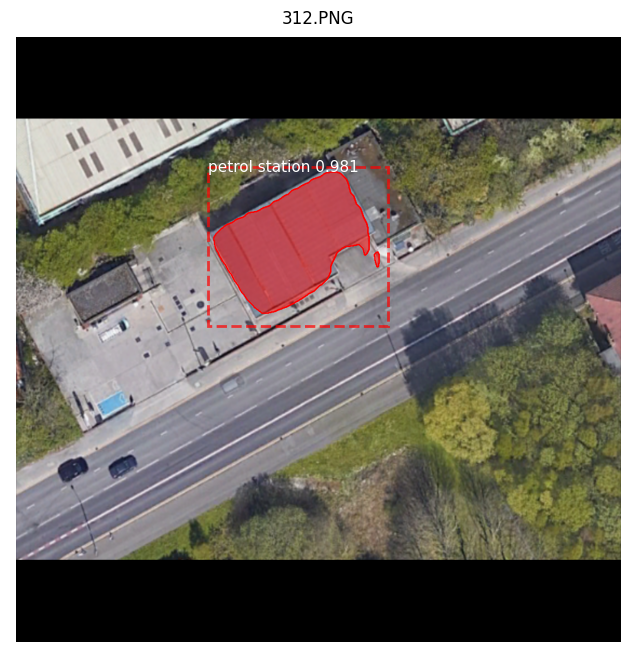


Average Precision :  1.0
Precison :  0.667
Recall :  0.667
F1 Score :  0.667

7 ) 313.PNG

2  out of  1  objects detected  



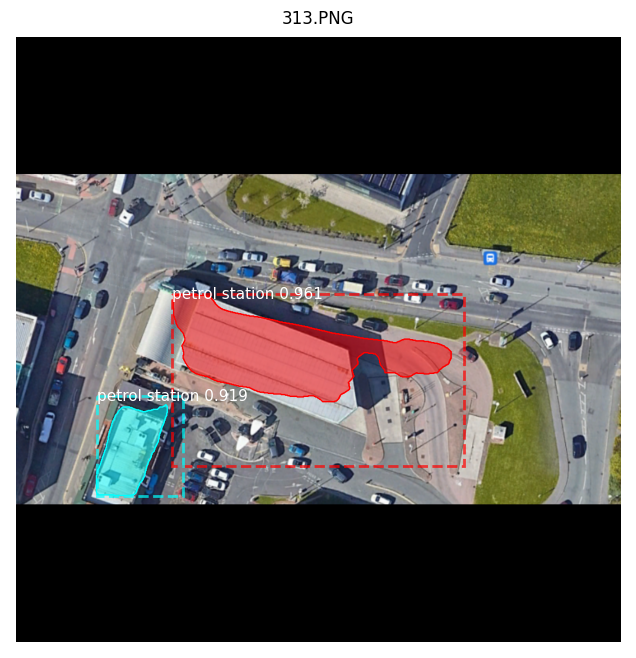


Average Precision :  1.0
Precison :  0.625
Recall :  0.75
F1 Score :  0.682

Mean Average Precision for the whole set of images =  0.75
F1 Score for the whole set of images =  0.556


In [12]:
# Inference 
imageSubFolder = "test"
mrcnnCustom.modelPredict(config, model_eval, PATHS["root_dir"], imageSubFolder, objectList)